Caso 1 regresión lineal

In [ ]:
!pip install -U scikit-learn

import sklearn
print(sklearn.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
1.7.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_r = pd.read_csv("/content/dataset_regresion.csv")
# Vista general
print("Primeras filas del dataset:")
print(df_r.head(), "\n")

# Estadísticos descriptivos
print("Resumen estadístico:")
print(df_r.describe(), "\n")

# Valores nulos
print("Valores nulos por columna:")
print(df_r.isnull().sum(), "\n")


Primeras filas del dataset:
            Y         X1         X2        X3        X4
0   76.085462  37.454012  34.908086  0.177701  0.957190
1  308.432829  95.071431  26.804818 -1.335344  0.918433
2  315.400672  73.199394  15.476381  0.380198  0.999432
3  259.833644  59.865848  40.689751  0.610586  0.720319
4   65.313598  15.601864  34.236559  0.559790  0.353775 

Resumen estadístico:
                Y          X1          X2          X3          X4
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean   197.511746   49.856171   24.097570    0.116847    0.199036
std    107.631032   29.868841   14.274673    0.983976    0.687542
min    -88.004664    0.506158    0.231601   -2.896255   -1.000000
25%    116.648171   24.127969   11.454962   -0.555269   -0.400508
50%    197.603424   51.316375   23.591078    0.126840    0.353213
75%    275.733447   75.612488   36.316841    0.736043    0.850262
max    466.358954   99.296480   49.985884    2.579709    0.999997 

Valores nulos por

Análisis de supuestos para regresión simple:
Coeficiente de determinación (R^2): 0.7236104276487021
Error cuadrático medio (MSE): 3195.4145210059805
Pendiente (m): 3.0652898295930906
Intercepto (b): 44.688131524520514


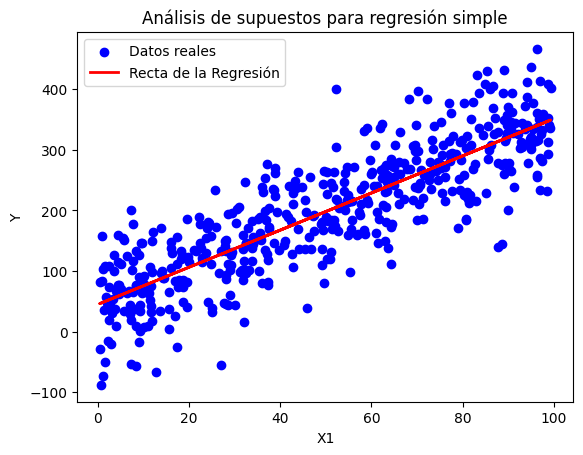

In [ ]:
#supuestos para regresión simple
X_simple = df_r[["X1"]]
y_simple = df_r["Y"]

modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_simple)

y_pred_simple = modelo_simple.predict(X_simple)

r2_simple = r2_score(y_simple, y_pred_simple)
mse_simple = mean_squared_error(y_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("Análisis de supuestos para regresión simple:")
print("Coeficiente de determinación (R^2):", r2_simple)
print("Error cuadrático medio (MSE):", mse_simple)

print(f"Pendiente (m): {modelo_simple.coef_[0]}")
print(f"Intercepto (b): {modelo_simple.intercept_}")

plt.scatter(X_simple, y_simple, color='blue', label='Datos reales')
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Recta de la Regresión')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Análisis de supuestos para regresión simple')
plt.legend()
plt.show()

           Y        X1        X2        X3        X4
Y   1.000000  0.850653  0.286654 -0.110852 -0.062161
X1  0.850653  1.000000  0.010354 -0.093320 -0.044635
X2  0.286654  0.010354  1.000000  0.010555  0.043009
X3 -0.110852 -0.093320  0.010555  1.000000 -0.010924
X4 -0.062161 -0.044635  0.043009 -0.010924  1.000000


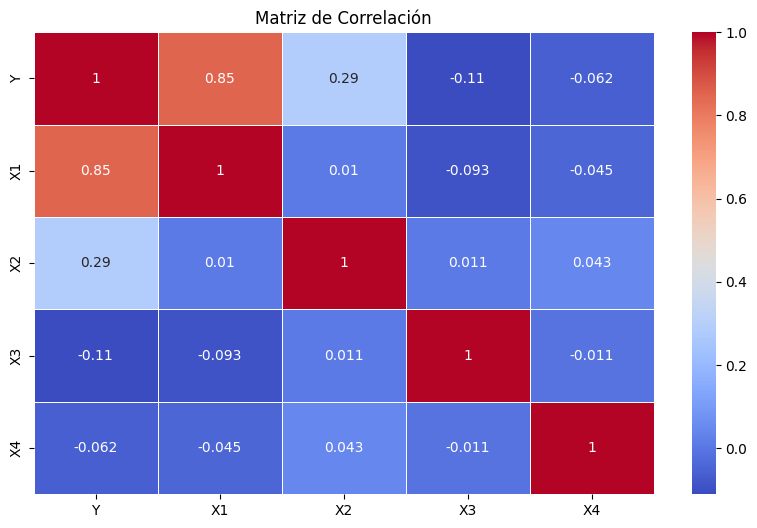

In [ ]:
print(df_r.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(df_r.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


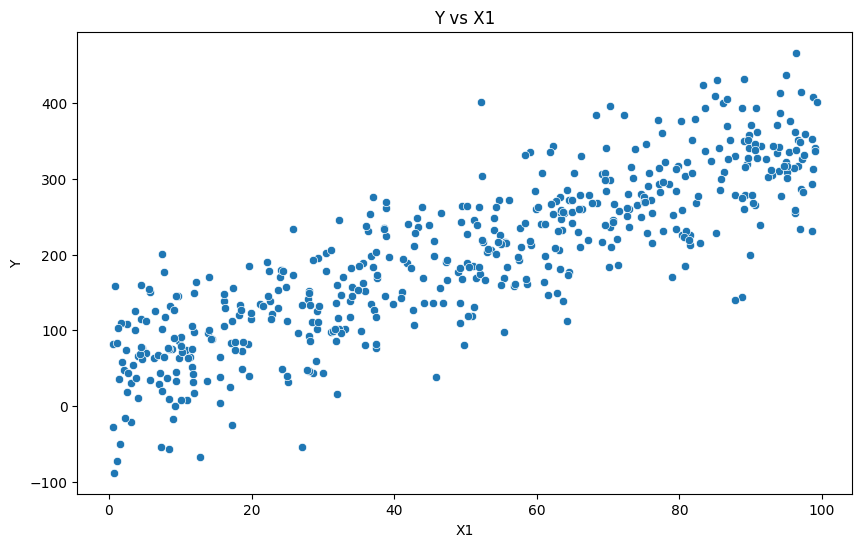

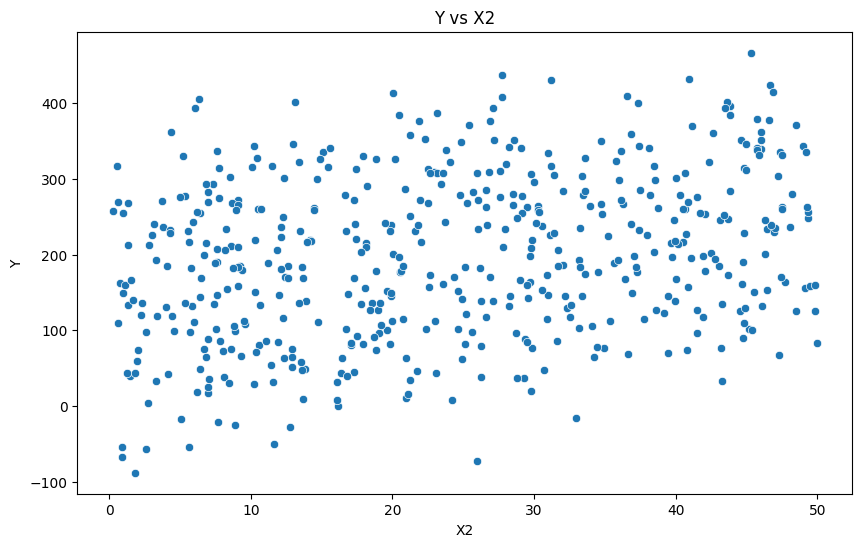

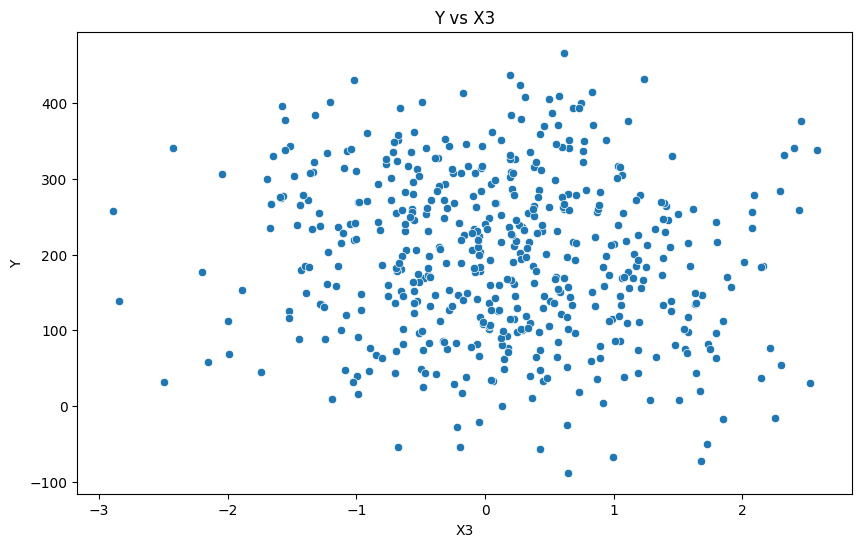

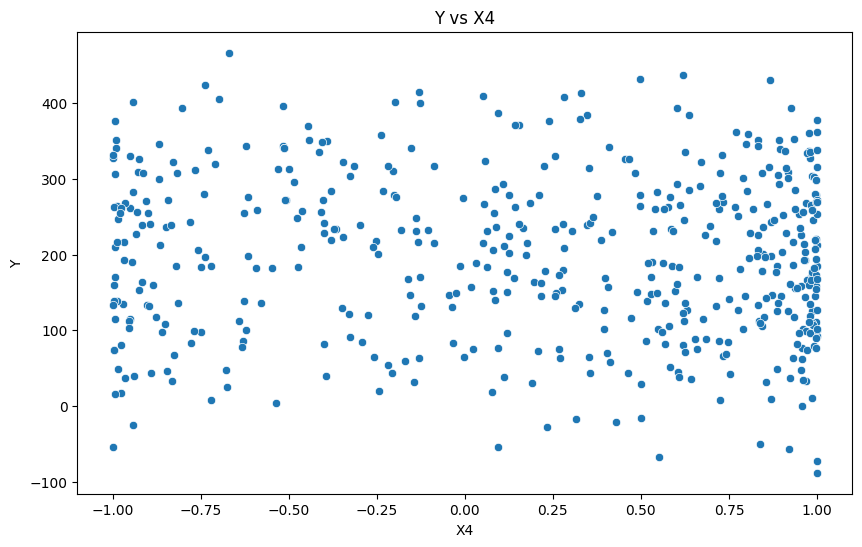

In [ ]:
for i in ["X1", "X2", "X3", "X4"]:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=i, y=df_r["Y"], data= df_r)
  plt.title(f'Y vs {i}')
  plt.show()

In [ ]:
#Establecer variables
x_multiple = df_r[["X1", "X2", "X3", "X4"]]
y_multiple = df_r["Y"]

#Crear modelo
modelo_multiple= LinearRegression()
modelo_multiple.fit(x_multiple, y_multiple)

y_pred_multiple = modelo_multiple.predict(x_multiple)
r2_multiple = r2_score(y_multiple, y_pred_multiple)
mse_multiple = mean_squared_error(y_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print("Análisis de supuestos para regresión múltiple:")
print("Coeficiente de determinación (R^2):", r2_multiple)
print("Error cuadrático medio (MSE):", mse_multiple)
print(f"Pendiente (m): {modelo_multiple.coef_}")
print(f"Intercepto (b): {modelo_multiple.intercept_}")

print("\n=== REGRESION LINEAL MULTIPLE ===")
print("Coeficientes")
for var, coef in zip(x_multiple.columns, modelo_multiple.coef_):
  print(f"{var}: {coef:.4f}")
print(f"Intercepto: {modelo_multiple.intercept_}")
print(f"R^2: {r2_multiple}")
print(f"MSE: {mse_multiple}")
print(f"RMSE: {rmse_multiple}")


Análisis de supuestos para regresión múltiple:
Coeficiente de determinación (R^2): 0.8033911114494233
Error cuadrático medio (MSE): 2273.048480406641
Pendiente (m): [ 3.0369423   2.11039399 -3.88981772 -5.78733754]
Intercepto (b): -3.147532166627798

=== REGRESION LINEAL MULTIPLE ===
Coeficientes
X1: 3.0369
X2: 2.1104
X3: -3.8898
X4: -5.7873
Intercepto: -3.147532166627798
R^2: 0.8033911114494233
MSE: 2273.048480406641
RMSE: 47.67649819781903


La media de los resudios fue de: 2.842170943040401e-15


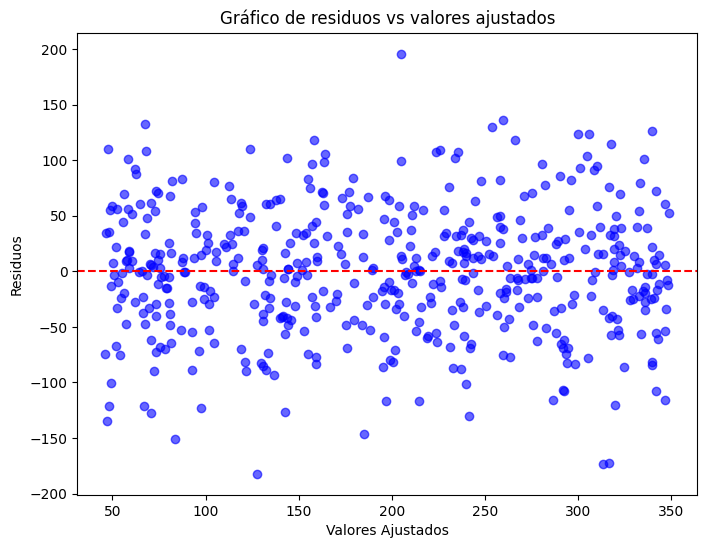

In [ ]:
y_hat= modelo_simple.predict(X_simple)
residuos = y_simple - y_hat

media_residuos = np.mean(residuos)

print(f"La media de los resudios fue de: {media_residuos}")

plt.figure(figsize=(8, 6))
plt.scatter(y_hat, residuos, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos vs valores ajustados")
plt.show()

Caso práctico

In [ ]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/GDP_2005_2025_final.csv")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())

(196, 22)
       Country      2005      2006      2007      2008      2009      2010  \
0  Afghanistan    6167.0    6925.0    8556.0   10297.0   12066.0   15325.0   
1      Albania    8148.0    9002.0   10804.0   13035.0   12187.0   12079.0   
2      Algeria  107047.0  123084.0  142483.0  180384.0  150317.0  177785.0   
3      Andorra    3158.0    3456.0    3952.0    4082.0    3675.0    3446.0   
4       Angola   41397.0   58654.0   73038.0   98790.0   81705.0   95547.0   

       2011      2012      2013  ...      2016      2017      2018      2019  \
0   17890.0   20293.0   20170.0  ...   18020.0   18883.0   18336.0   18876.0   
1   13052.0   12470.0   12936.0  ...   12003.0   13209.0   15337.0   15582.0   
2  218332.0  227144.0  229701.0  ...  180764.0  190004.0  194507.0  193361.0   
3    3625.0    3189.0    3193.0  ...    2895.0    2993.0    3217.0    3155.0   
4  125552.0  143573.0  153761.0  ...  114764.0  139835.0  114189.0   94671.0   

     2020      2021      2022      2023 

Número de paises:196
Años: Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025'],
      dtype='object')
       Country  Year       GDP
0  Afghanistan  2005    6167.0
1      Albania  2005    8148.0
2      Algeria  2005  107047.0
3      Andorra  2005    3158.0
4       Angola  2005   41397.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4116 non-null   object 
 1   Year     4116 non-null   object 
 2   GDP      4078 non-null   float64
dtypes: float64(1), object(2)
memory usage: 96.6+ KB
None


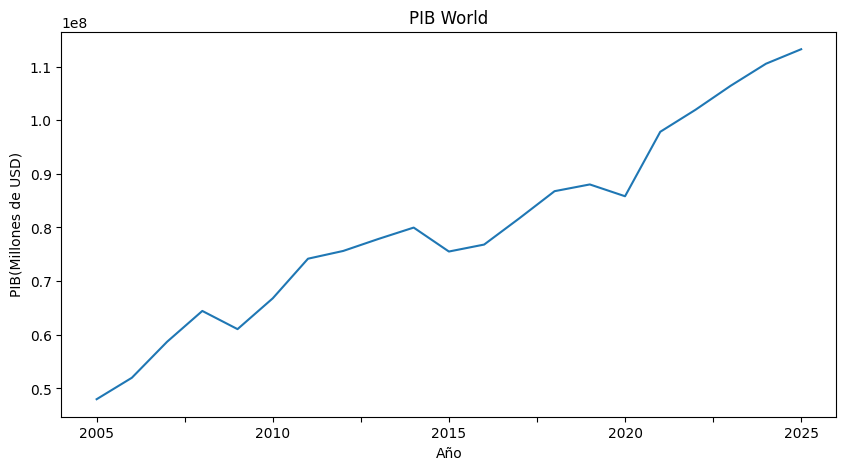

In [ ]:
print(f"Número de paises:{df["Country"].nunique()}")
print(f"Años: {df.columns[1:] }")

df_long=pd.melt(df,id_vars="Country",var_name="Year",value_name="GDP")
print(df_long.head())
df_long["Year"]=df_long["Year"].astype(str)
print(df_long.info())
df_long=df_long.sort_values(["Country","Year"])

world_gdp=df_long.groupby("Year")["GDP"].sum()
plt.figure(figsize=(10,5))
world_gdp.plot()
plt.title("PIB World")
plt.xlabel("Año")
plt.ylabel("PIB(Millones de USD)")
plt.show()

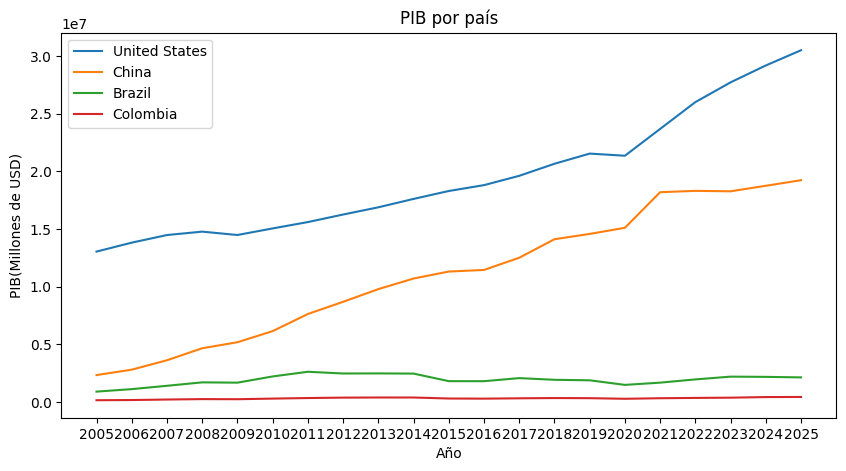

In [ ]:
countries=["United States", "China", "Brazil", "Colombia"]
plt.figure(figsize=(10,5))
for c in countries:
  subset = df_long[df_long["Country"] == c]
  plt.plot(subset["Year"], subset["GDP"], label=c)
plt.title("PIB por país")
plt.xlabel("Año")
plt.ylabel("PIB(Millones de USD)")
plt.legend()
plt.show()

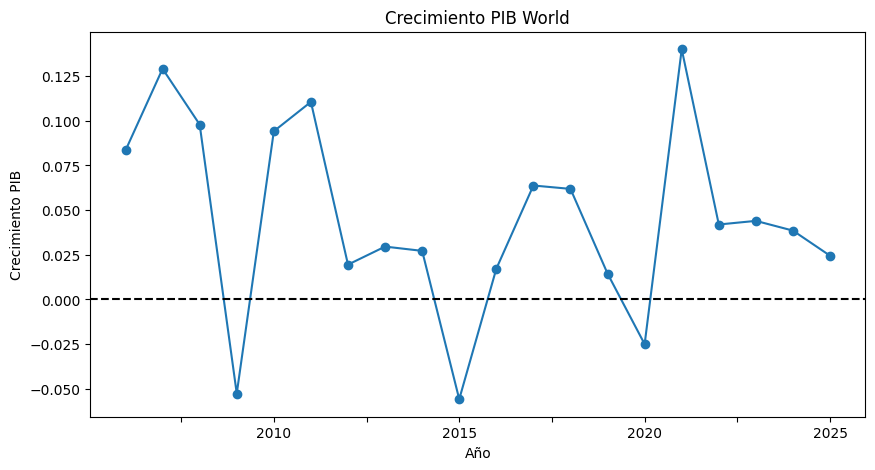

In [ ]:
world_growth=world_gdp.pct_change()
plt.figure(figsize=(10,5))
world_growth.plot(marker="o")
plt.title("Crecimiento PIB World")
plt.xlabel("Año")
plt.ylabel("Crecimiento PIB")
plt.axhline(y=0,color="black",linestyle="--")
plt.show()

In [7]:
#Generar mi clase

class AdvancedGDPAnalyzer:
  def __init__(self, file_path):
        self.file_path = file_path
        self.df_long = None
        self.models = {}
        self.results = {}
        self.feature_importance = {}

  def load_and_preprocess(self):
    df=pd.read_csv("/content/GDP_2005_2025_final.csv")
    self.df_long= df.melt(df,id_vars="Country",var_name="Year",value_name="GDP").rename(columns={df.columns[0]: "Country"})
    self.df_long["Year"]=self.df_long["Year"].astype(str)
    self.df_long=self.df_long[(self.df_long["GDP"] >0)& (self.df_long["GDP"< 1e14])].copy()
    self.df_long.sort_values(["Country","Year"])
    self.df_long.reset_index(drop=True,inplace=True)
    print(f"Dataset cargado exitosamente")
    print(f"Características: {len(self.df_long)} filas, {len(self.df_long.columns)} columnas y {self.df_long["Country"].nunique()} países")
    return self.df_long

  def create_advanced_features(self):
    print("🔧 Creando features avanzadas...")

    # Agrupar por país para hacer cálculos por cada país individualmente
    grouped = self.df_long.groupby('Country')

    # FEATURES TEMPORALES BÁSICAS:

    # GDP_lag1: PIB del año anterior (t-1)
    self.df_long['GDP_lag1'] = grouped['GDP'].shift(1)

    # GDP_lag2: PIB de hace dos años (t-2)
    self.df_long['GDP_lag2'] = grouped['GDP'].shift(2)

    # GDP_growth: Tasa de crecimiento anual ((PIB_t - PIB_t-1) / PIB_t-1)
    self.df_long['GDP_growth'] = grouped['GDP'].pct_change()

    # FEATURES AVANZADAS:

    # Media móvil de 3 años: suaviza fluctuaciones temporales
    self.df_long['GDP_rolling_mean_3'] = grouped['GDP'].rolling(3, min_periods=1).mean().values

    # Volatilidad: desviación estándar de 3 años
    self.df_long['GDP_rolling_std_3'] = grouped['GDP'].rolling(3, min_periods=1).std().values

    # Logaritmo del GDP: transforma la distribución (muy útil para modelos lineales)
    self.df_long['GDP_log'] = np.log1p(self.df_long['GDP'])  # log1p evita problemas con 0

    # VARIABLES ESTRUCTURALES:

    # Ranking global: posición del país en el mundo por PIB cada año
    self.df_long['GDP_global_rank'] = self.df_long.groupby('Year')['GDP'].rank(ascending=False)

    # Percentil global: qué porcentaje de países tiene PIB menor
    self.df_long['GDP_global_pct'] = self.df_long.groupby('Year')['GDP'].rank(pct=True)

    # VARIABLES DE CRISIS (DUMMY):

    # Crisis 2008: 1 si es 2008 o 2009, 0 sino
    self.df_long['crisis_2008'] = (self.df_long['Year'].between(2008, 2009)).astype(int)

    # Crisis COVID: 1 si es 2020, 0 sino
    self.df_long['crisis_2020'] = (self.df_long['Year'] == 2020).astype(int)

    # Post-COVID: 1 si es después de 2020, 0 sino
    self.df_long['post_covid'] = (self.df_long['Year'] > 2020).astype(int)

    # TENDENCIA POR PAÍS:

    # Pendiente de la tendencia lineal del PIB por país
    self.df_long['country_trend'] = grouped['GDP'].transform(
        lambda x: np.polyfit(range(len(x)), x.values, 1)[0] if len(x) > 1 else 0
    )  # Calcula la pendiente de una línea que mejor se ajusta a los datos del país

    # VARIABLE OBJETIVO PARA CLASIFICACIÓN:

    # 1 si el crecimiento es > 1%, 0 sino (umbral más realista que 0%)
    self.df_long['Growth_Positive'] = (self.df_long['GDP_growth'] > 0.01).astype(int)

    # Eliminar filas que quedaron con NaN por los lags
    initial_rows = len(self.df_long)
    self.df_long = self.df_long.dropna(subset=['GDP_lag1', 'GDP_lag2', 'GDP_growth'])

    print(f"Features creadas. Filas finales: {len(self.df_long)}")
    return self.df_long

def analyze_data_quality(self):
    print("\n Análisis de calidad de datos:")
    print(f"Países únicos: {self.df_long['Country'].nunique()}")
    print(f"Rango de años: {self.df_long['Year'].min()} - {self.df_long['Year'].max()}")
    print(f"Valores nulos: {self.df_long.isnull().sum().sum()}")

    # Crear 3 gráficos para entender la distribución de los datos
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Distribución del GDP (en escala logarítmica)
    plt.subplot(1, 3, 1)
    plt.hist(np.log1p(self.df_long['GDP']), bins=50, alpha=0.7, color='skyblue')
    plt.title('Distribución del GDP (log)')
    plt.xlabel('log(GDP)')

    # Gráfico 2: Distribución de las tasas de crecimiento
    plt.subplot(1, 3, 2)
    growth_clean = self.df_long['GDP_growth'].dropna()
    plt.hist(growth_clean, bins=50, alpha=0.7, color='lightcoral')
    plt.title('Distribución del Crecimiento')
    plt.xlabel('Tasa de crecimiento')

    # Gráfico 3: Balance de clases para clasificación
    plt.subplot(1, 3, 3)
    self.df_long['Growth_Positive'].value_counts().plot(kind='bar', color=['red', 'green'])
    plt.title('Balance de Clases (Crecimiento Positivo)')
    plt.xticks([0, 1], ['Negativo', 'Positivo'], rotation=0)

    plt.tight_layout()
    plt.show()

    return self.df_long


def prepare_modeling_data(self, task_type='regression'):
    # Definir qué variables usaremos como predictores
    numeric_features = ['Year', 'GDP_lag1', 'GDP_lag2', 'GDP_rolling_mean_3',
                      'GDP_rolling_std_3', 'GDP_global_rank', 'GDP_global_pct',
                      'country_trend']

    categorical_features = ['Country']  # El país como variable categórica

    # Dividir temporalmente: 80% primeros años para entrenar, 20% últimos para testear
    split_year = self.df_long['Year'].quantile(0.8)  # El año que está en el percentil 80

    if task_type == 'regression':
        # Para regresión: predecir el PIB
        mask = ~self.df_long['GDP'].isna()
        df_model = self.df_long[mask].copy()
        X = df_model[numeric_features + categorical_features]  # Variables predictoras
        y = df_model['GDP_log']  # Variable a predecir (PIB en log)

    else:  # classification
        # Para clasificación: predecir si habrá crecimiento positivo
        mask = ~self.df_long['Growth_Positive'].isna()
        df_model = self.df_long[mask].copy()
        X = df_model[numeric_features + categorical_features]  # Variables predictoras
        y = df_model['Growth_Positive']  # Variable a predecir (1 o 0)

    # Crear máscaras para separar entrenamiento y prueba
    train_mask = df_model['Year'] <= split_year  # Años de entrenamiento
    test_mask = df_model['Year'] > split_year   # Años de prueba

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]

    print(f"📈 Datos para {task_type}:")
    print(f"   Train: {len(X_train)} muestras")
    print(f"   Test:  {len(X_test)} muestras")

    return X_train, X_test, y_train, y_test, numeric_features, categorical_features

def build_preprocessor(self, numeric_features, categorical_features):
    # Pipeline para variables numéricas:
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Llenar NaN con la mediana
        ('scaler', StandardScaler())  # Estandarizar (media=0, desviación=1)
    ])

    # Pipeline para variables categóricas:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Llenar NaN con 'Unknown'
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convertir texto a números
    ])

    # Unir ambos preprocesadores
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),  # Aplicar a numéricas
            ('cat', categorical_transformer, categorical_features)  # Aplicar a categóricas
        ]
    )

    return preprocessor
def train_regression_models(self):
    print("\n🔮 ENTRENANDO MODELOS DE REGRESIÓN...")

    # Obtener datos preparados
    X_train, X_test, y_train, y_test, num_feats, cat_feats = self.prepare_modeling_data('regression')
    preprocessor = self.build_preprocessor(num_feats, cat_feats)

    # Definir los modelos a usar:
    models = {
        'LinearRegression': LinearRegression(),  # Regresión lineal simple
        'Ridge': Ridge(alpha=1.0),  # Regresión lineal con regularización L2
        'Lasso': Lasso(alpha=0.1),  # Regresión lineal con regularización L1
        'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),  # Bosques aleatorios
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)  # Boosting
    }

    for name, model in models.items():
        print(f"   Entrenando {name}...")

        # Crear pipeline: preprocesar → modelar
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Entrenar el modelo
        pipeline.fit(X_train, y_train)

        # Predecir en datos de prueba
        y_pred_log = pipeline.predict(X_test)  # Predicciones en escala log
        y_pred = np.expm1(y_pred_log)  # Convertir a escala original (inverso de log1p)
        y_test_original = np.expm1(y_test)  # Convertir targets a escala original

        # Calcular métricas de evaluación:
        mae = mean_absolute_error(y_test_original, y_pred)  # Error absoluto medio
        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))  # Raíz del error cuadrático medio
        r2 = r2_score(y_test_original, y_pred)  # Coeficiente de determinación
        mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100  # Error porcentual

        # Guardar resultados
        self.models[f"{name}_reg"] = pipeline
        self.results[f"{name}_reg"] = {
            'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape,
            'predictions': y_pred
        }

        print(f"     ✅ {name}: R²={r2:.3f}, RMSE={rmse:,.0f}, MAPE={mape:.1f}%")

    return self.results
def train_classification_models(self):
    print("\n🎯 ENTRENANDO MODELOS DE CLASIFICACIÓN...")

    X_train, X_test, y_train, y_test, num_feats, cat_feats = self.prepare_modeling_data('classification')
    preprocessor = self.build_preprocessor(num_feats, cat_feats)

    # Modelos para clasificación:
    models = {
        'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
        'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42, n_jobs=-1),
        'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        print(f"   Entrenando {name}...")

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)

        # Predecir
        y_pred = pipeline.predict(X_test)  # Predicciones (0 o 1)
        y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades de clase 1

        # Métricas de clasificación:
        accuracy = accuracy_score(y_test, y_pred)  # Porcentaje de aciertos
        auc_roc = roc_auc_score(y_test, y_proba)  # Área bajo la curva ROC

        self.models[f"{name}_clf"] = pipeline
        self.results[f"{name}_clf"] = {
            'accuracy': accuracy, 'auc_roc': auc_roc,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'predictions': y_pred
        }

        print(f"     ✅ {name}: Accuracy={accuracy:.3f}, AUC-ROC={auc_roc:.3f}")

    return self.results
def plot_comprehensive_results(self):
    print("\n📊 GENERANDO REPORTE VISUAL...")

    # Crear figura con 2 filas y 3 columnas de gráficos
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # GRÁFICOS DE REGRESIÓN (fila 1):
    reg_results = {k: v for k, v in self.results.items() if 'reg' in k}
    reg_models = list(reg_results.keys())

    # 3 métricas para regresión
    metrics = ['r2', 'rmse', 'mape']
    metric_names = ['R² Score', 'RMSE', 'MAPE (%)']

    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        values = [reg_results[m][metric] for m in reg_models]
        if metric == 'rmse':
            values = [v/1e6 for v in values]  # Convertir a millones para mejor lectura
            name = 'RMSE (Millones)'

        axes[0, i].bar(reg_models, values, alpha=0.7)
        axes[0, i].set_title(f'Regresión - {name}')
        axes[0, i].tick_params(axis='x', rotation=45)

    # GRÁFICOS DE CLASIFICACIÓN (fila 2):
    clf_results = {k: v for k, v in self.results.items() if 'clf' in k}
    clf_models = list(clf_results.keys())

    clf_metrics = ['accuracy', 'auc_roc']
    clf_names = ['Accuracy', 'AUC-ROC']

    for i, (metric, name) in enumerate(zip(clf_metrics, clf_names)):
        values = [clf_results[m][metric] for m in clf_models]
        axes[1, i].bar(clf_models, values, alpha=0.7)
        axes[1, i].set_title(f'Clasificación - {name}')
        axes[1, i].set_ylim(0, 1)  # Las métricas de clasificación van de 0 a 1
        axes[1, i].tick_params(axis='x', rotation=45)

    # GRÁFICO DE DISPERSIÓN (predicciones vs reales):
    best_reg = max(reg_results.keys(), key=lambda x: reg_results[x]['r2'])
    X_train, X_test, y_train, y_test, _, _ = self.prepare_modeling_data('regression')
    best_pipeline = self.models[best_reg]

    y_pred_log = best_pipeline.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Gráfico de dispersión: valores reales vs predichos
    axes[1, 2].scatter(y_test_original, y_pred, alpha=0.6, color='blue')
    # Línea de perfecta predicción (y = x)
    axes[1, 2].plot([y_test_original.min(), y_test_original.max()],
                   [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
    axes[1, 2].set_xlabel('GDP Real')
    axes[1, 2].set_ylabel('GDP Predicho')
    axes[1, 2].set_title(f'Mejor Modelo: {best_reg}\nR² = {reg_results[best_reg]["r2"]:.3f}')

    plt.tight_layout()
    plt.show()
def generate_country_analysis(self, country_name):
    # Filtrar datos del país específico
    country_data = self.df_long[self.df_long['Country'] == country_name].copy()

    if len(country_data) == 0:
        print(f"❌ País '{country_name}' no encontrado")
        return

    print(f"\n🇺🇳 ANÁLISIS PARA {country_name.upper()}:")
    print(f"   Años disponibles: {len(country_data)}")
    print(f"   GDP promedio: {country_data['GDP'].mean():,.0f}")
    print(f"   Tasa de crecimiento promedio: {country_data['GDP_growth'].mean():.2%}")
    print(f"   Porcentaje de años con crecimiento positivo: {country_data['Growth_Positive'].mean():.1%}")

    # Crear gráficos específicos del país
    plt.figure(figsize=(12, 4))

    # Gráfico 1: Evolución del PIB
    plt.subplot(1, 2, 1)
    plt.plot(country_data['Year'], country_data['GDP'], marker='o', linewidth=2)
    plt.title(f'Evolución del GDP - {country_name}')
    plt.xlabel('Año')
    plt.ylabel('GDP')
    plt.grid(True, alpha=0.3)

    # Gráfico 2: Tasas de crecimiento anual
    plt.subplot(1, 2, 2)
    growth_data = country_data.dropna(subset=['GDP_growth'])
    # Barras verdes para crecimiento positivo, rojas para negativo
    plt.bar(growth_data['Year'], growth_data['GDP_growth'] * 100,
           color=growth_data['Growth_Positive'].map({0: 'red', 1: 'green'}))
    plt.title(f'Tasa de Crecimiento - {country_name}')
    plt.xlabel('Año')
    plt.ylabel('Crecimiento (%)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
def run_complete_analysis(self):
    print("🚀 INICIANDO ANÁLISIS COMPLETO DE DATOS GDP")
    print("=" * 50)

    # Flujo completo del análisis:
    self.load_and_preprocess()  # 1. Cargar datos
    self.create_advanced_features()  # 2. Crear variables
    self.analyze_data_quality()  # 3. Análisis exploratorio
    self.train_regression_models()  # 4. Modelos de regresión
    self.train_classification_models()  # 5. Modelos de clasificación
    self.plot_comprehensive_results()  # 6. Visualización
    self._print_executive_summary()  # 7. Resumen ejecutivo

    print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE!")
    return self.results

if __name__ == "__main__":
    # Crear el analizador con la ruta del archivo
    analyzer = AdvancedGDPAnalyzer('/content/GDP_2005_2025_final.csv')

    # Ejecutar análisis completo
    results = analyzer.run_complete_analysis()

    # Análisis específico para países de interés
    analyzer.generate_country_analysis('Brazil')
    analyzer.generate_country_analysis('Argentina')
    analyzer.generate_country_analysis('Chile')


AttributeError: 'AdvancedGDPAnalyzer' object has no attribute 'run_complete_analysis'